In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\fabri\Desktop\fin_project\env\project\data\train_clean.csv')

df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [4]:
df.isna().sum()

id                      0
Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
Price                   0
dtype: int64

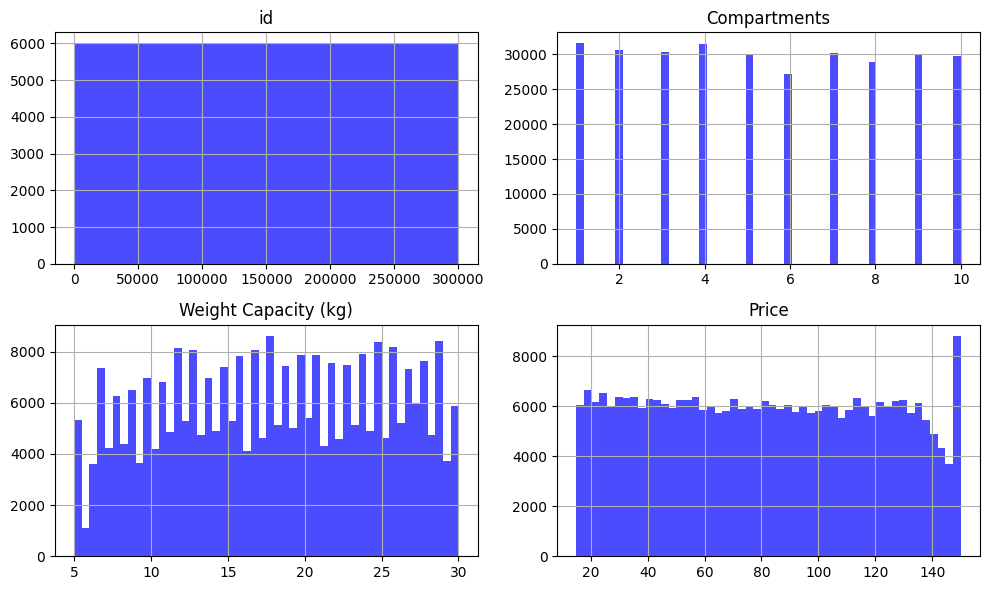

In [5]:
df.hist(figsize=(10, 6), bins=50, color='blue', alpha=0.7)
plt.tight_layout()
plt.show()

In [6]:
import numpy as np

df_num = df.select_dtypes(include=['int64', 'float64'])
df_num = np.log1p(df_num)

In [18]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num = np.log1p(df_num)

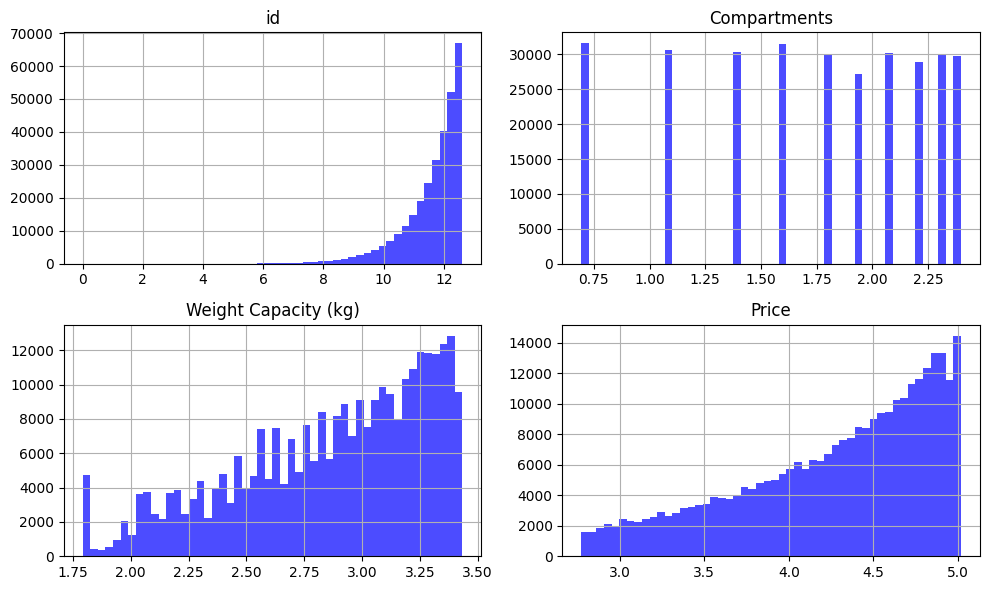

In [19]:
df_num.hist(figsize=(10, 6), bins=50, color='blue', alpha=0.7)
plt.tight_layout()
plt.show()

<h4>Vista il risultato dopo il logaritmo, non usiamo la trasformazione per l'addestramento</h4>

In [8]:
df["Brand"].unique()

array(['Jansport', 'Under Armour', 'Nike', 'Adidas', 'Puma'], dtype=object)

In [9]:
df["Color"].unique()


array(['Black', 'Green', 'Red', 'Blue', 'Gray', 'Pink'], dtype=object)

In [10]:
df["Material"].unique()

array(['Leather', 'Canvas', 'Nylon', 'Polyester'], dtype=object)

In [11]:
df.shape

(300000, 11)

Visualizziamo le correlazioni con il prezzo

In [12]:
from sklearn.preprocessing import LabelEncoder

# Label encode all object (categorical) columns
le = LabelEncoder()
cat_cols = df.select_dtypes(include=['object']).columns

df_le = df.copy()
for col in cat_cols:
    df_le[col] = le.fit_transform(df_le[col])

df_le.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,1,1,1,7.0,1,0,2,0,11.611723,112.15875
1,1,1,0,2,10.0,1,1,1,3,27.078537,68.88056
2,2,4,1,2,2.0,1,0,1,5,16.643760,39.17320
3,3,2,2,2,8.0,1,0,1,3,12.937220,80.60793
4,4,0,0,1,1.0,1,1,1,3,17.749338,86.02312


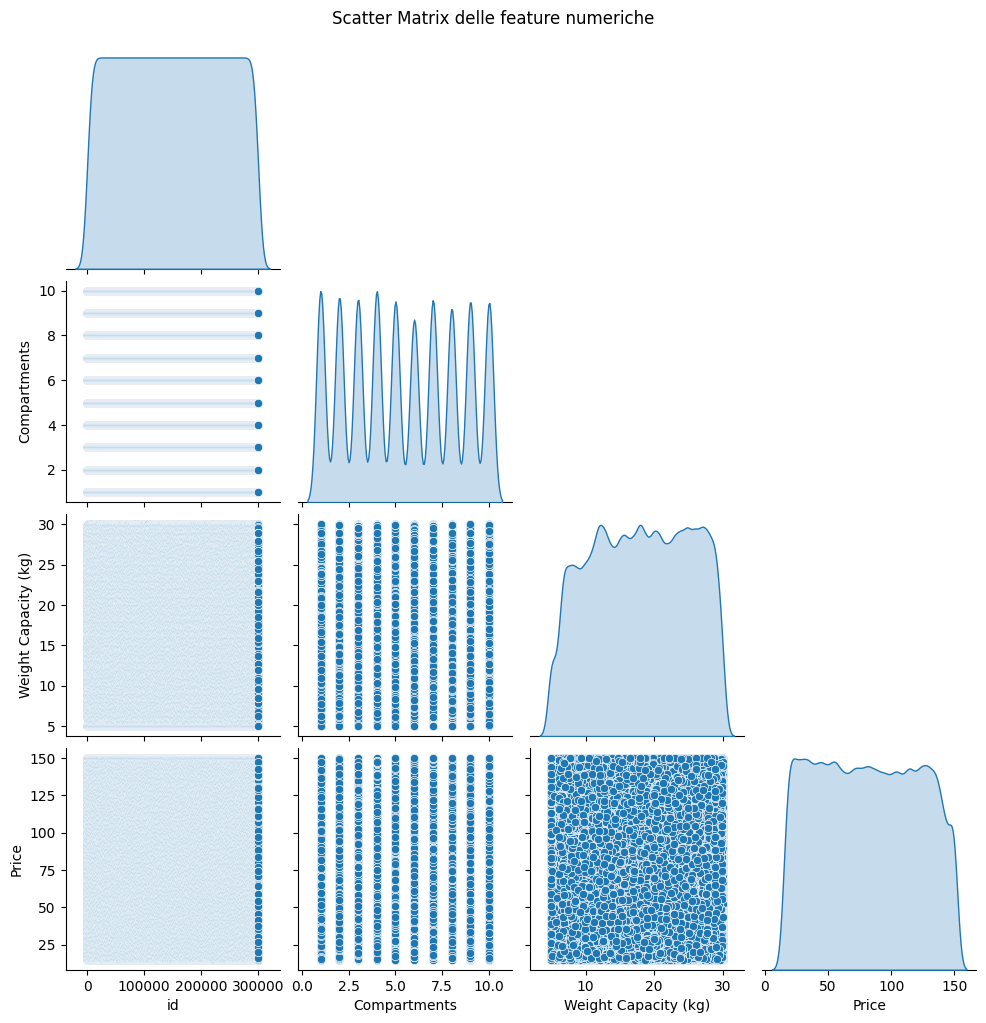

In [13]:
# Scatter matrix (pairplot) delle feature numeriche
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(df[num_cols], diag_kind='kde', corner=True)
plt.suptitle('Scatter Matrix delle feature numeriche', y=1.02)
plt.show()

In [14]:
df_log = np.log1p(df_le)

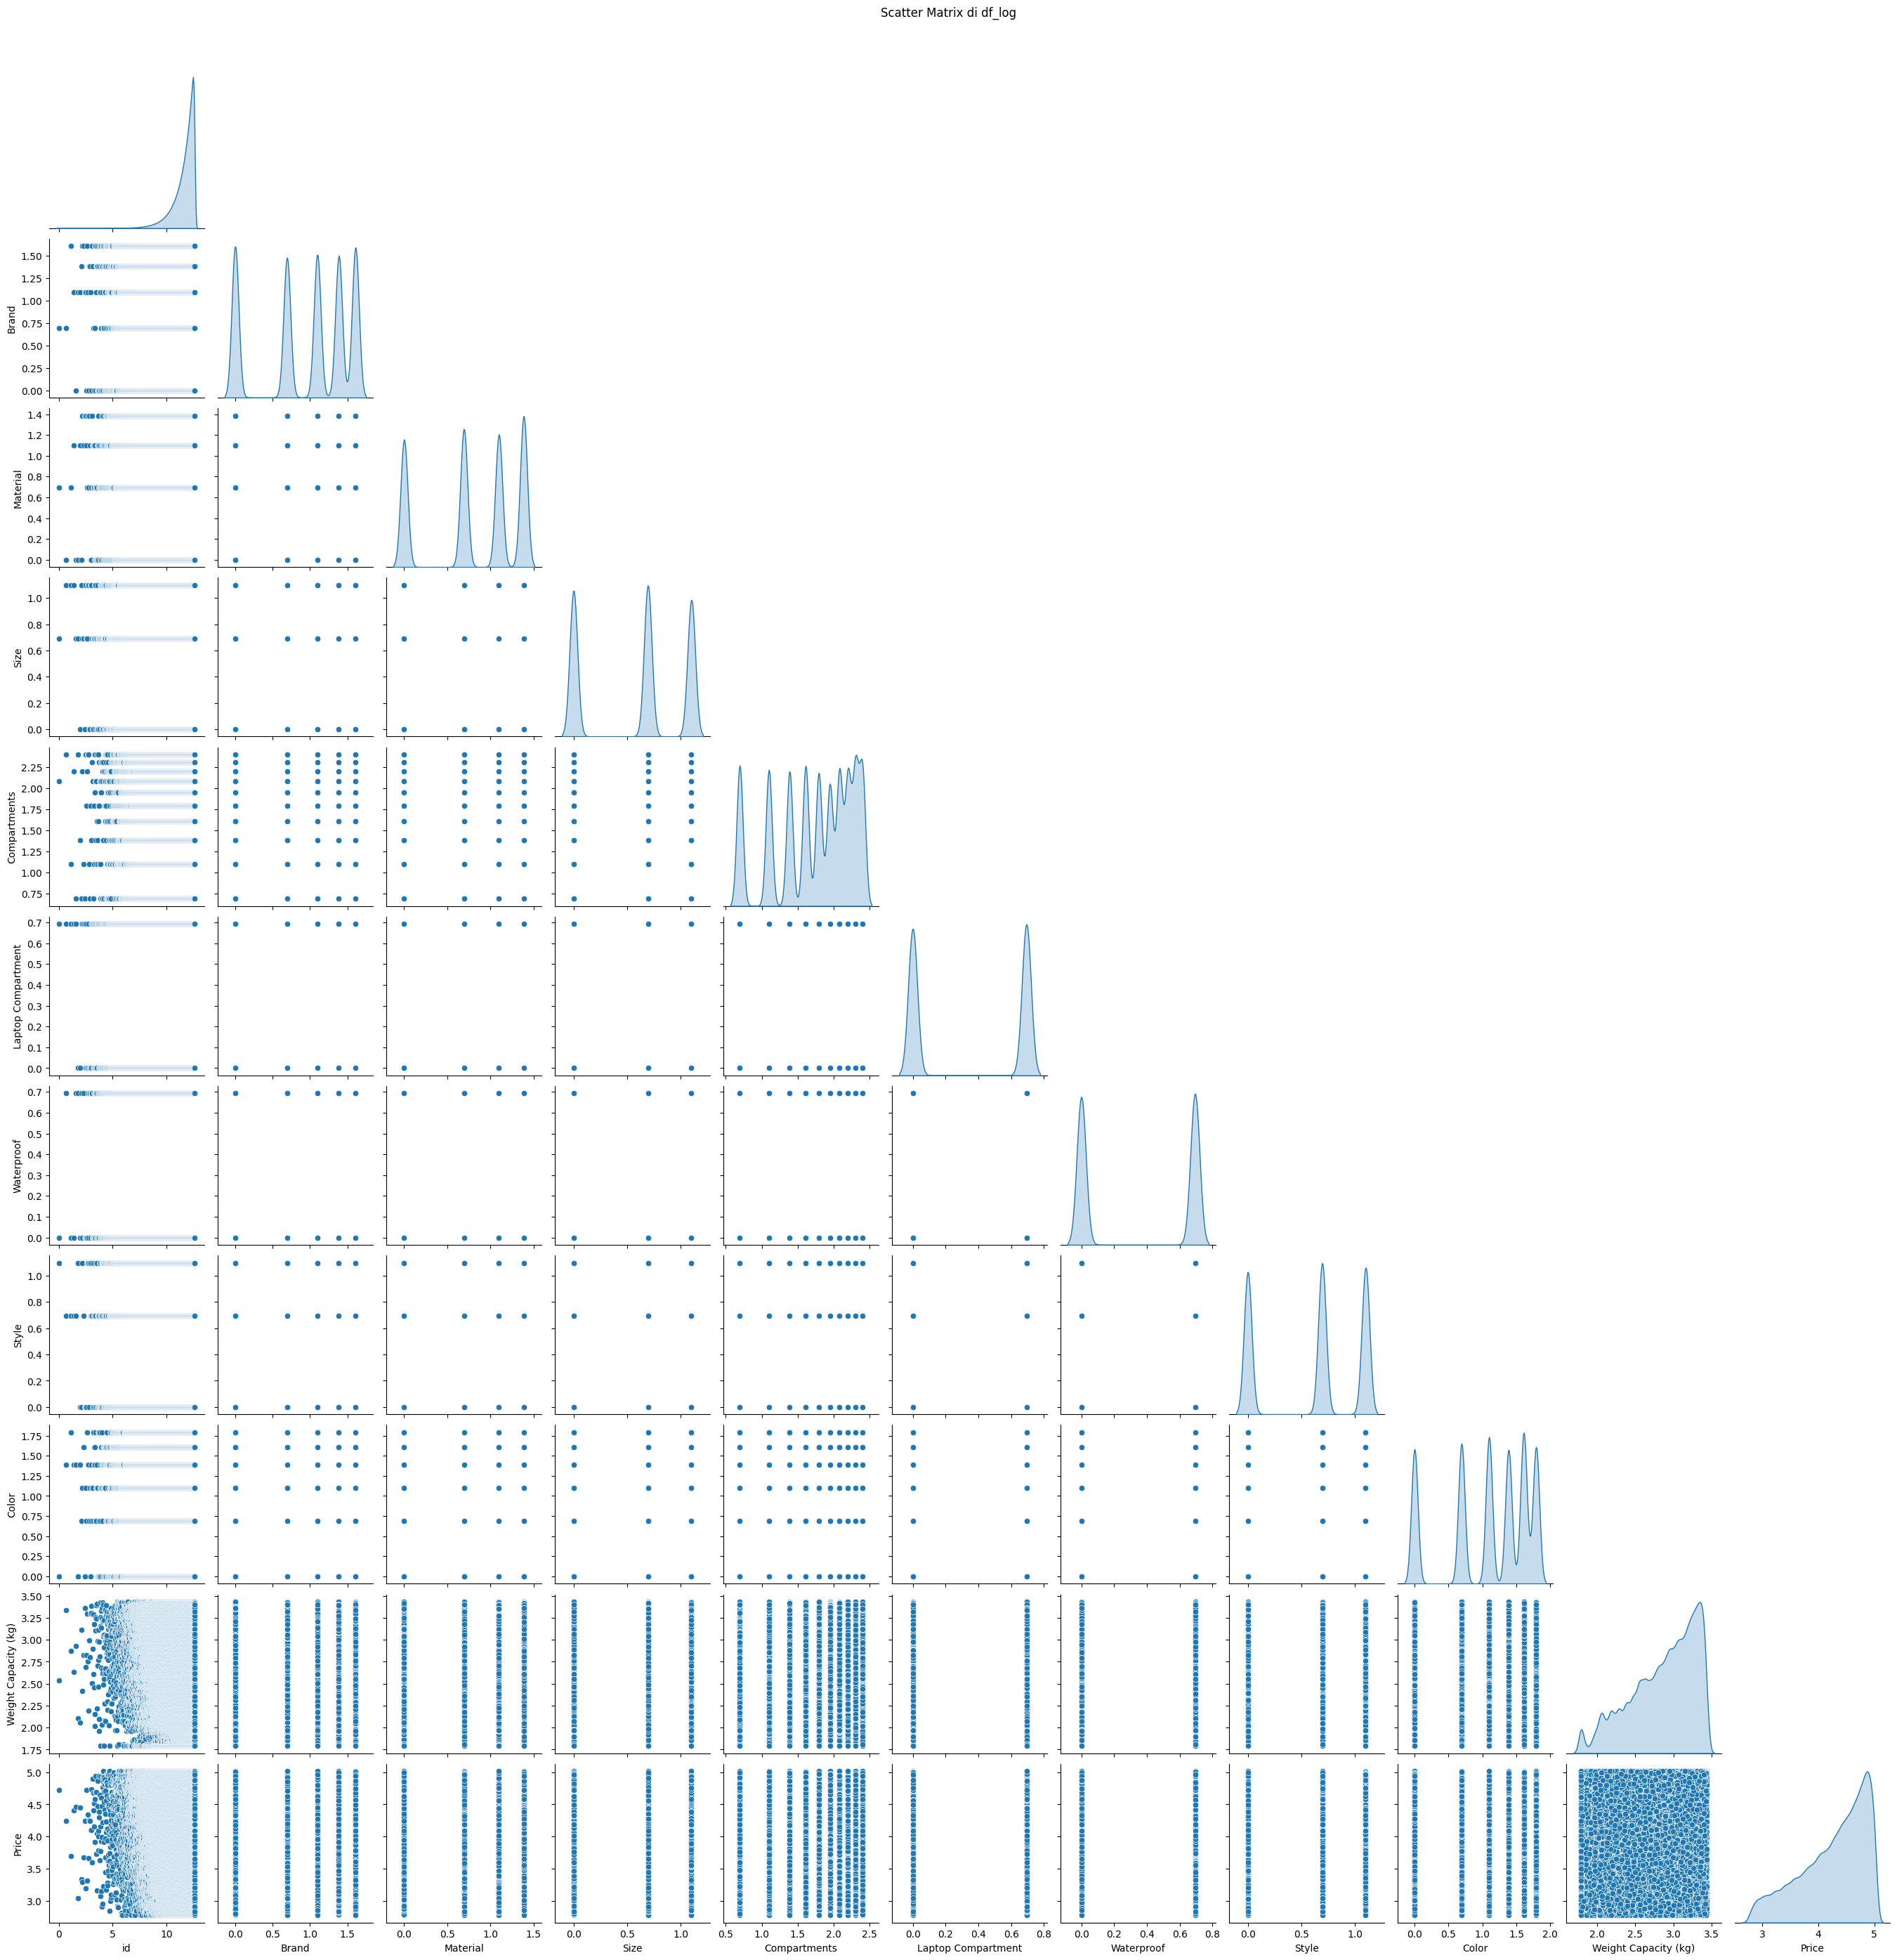

In [16]:
# Scatter matrix (pairplot) di df_log
sns.pairplot(df_log, diag_kind='kde', corner=True)
plt.suptitle('Scatter Matrix di df_log', y=1.02)
plt.show()

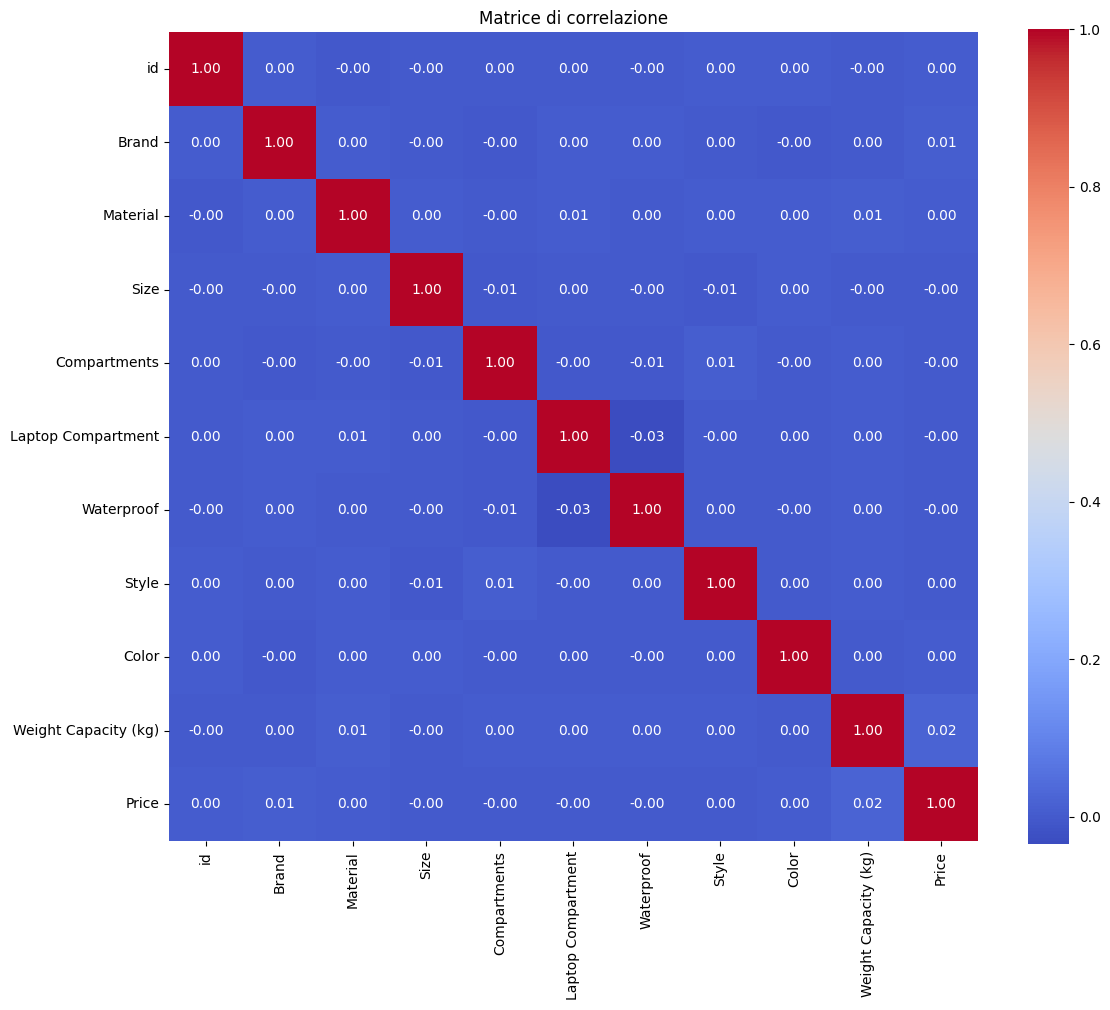

In [17]:
import seaborn as sns

df_le.corr()
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(df_le.corr(), cmap='coolwarm', annot=True, fmt=".2f", square=True)
plt.title('Matrice di correlazione')
plt.tight_layout()
plt.show()

<h3>Features engineering</h3>

In [23]:
# Aggiungo le feature "prezzo per kg" e "prezzo per compartimento"
df_le['price_per_kg'] = df_le['Price'] / df_le['Weight Capacity (kg)']
df_le['price_per_compartment'] = df_le['Price'] / df_le['Compartments']
df_le.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price,price_per_kg,price_per_compartment
0,0,1,1,1,7.0,1,0,2,0,11.611723,112.15875,9.659096,16.022679
1,1,1,0,2,10.0,1,1,1,3,27.078537,68.88056,2.543733,6.888056
2,2,4,1,2,2.0,1,0,1,5,16.643760,39.17320,2.353627,19.586600
3,3,2,2,2,8.0,1,0,1,3,12.937220,80.60793,6.230699,10.075991
4,4,0,0,1,1.0,1,1,1,3,17.749338,86.02312,4.846554,86.023120


In [24]:
# Aggiungo le nuove feature "capacity_per_compartment" e "price_per_kg_per_compartment"
df_le['capacity_per_compartment'] = df_le['Weight Capacity (kg)'] / df_le['Compartments']
df_le['price_per_kg_per_compartment'] = df_le['price_per_kg'] / df_le['Compartments']
df_le.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price,price_per_kg,price_per_compartment,capacity_per_compartment,price_per_kg_per_compartment
0,0,1,1,1,7.0,1,0,2,0,11.611723,112.15875,9.659096,16.022679,1.658818,1.379871
1,1,1,0,2,10.0,1,1,1,3,27.078537,68.88056,2.543733,6.888056,2.707854,0.254373
2,2,4,1,2,2.0,1,0,1,5,16.643760,39.17320,2.353627,19.586600,8.321880,1.176813
3,3,2,2,2,8.0,1,0,1,3,12.937220,80.60793,6.230699,10.075991,1.617153,0.778837
4,4,0,0,1,1.0,1,1,1,3,17.749338,86.02312,4.846554,86.023120,17.749338,4.846554


In [25]:
# Aggiungo le 4 feature anche al df originale
df['price_per_kg'] = df['Price'] / df['Weight Capacity (kg)']
df['price_per_compartment'] = df['Price'] / df['Compartments']
df['capacity_per_compartment'] = df['Weight Capacity (kg)'] / df['Compartments']
df['price_per_kg_per_compartment'] = df['price_per_kg'] / df['Compartments']

# Replico le stesse feature su df_le (sovrascrivendo se già presenti)
for feat in ['price_per_kg', 'price_per_compartment', 'capacity_per_compartment', 'price_per_kg_per_compartment']:
    df_le[feat] = df[feat]

# One-hot encoding delle variabili categoriche sul df originale
df_ohe = pd.get_dummies(df, columns=cat_cols)

# Anteprima del risultato
df_ohe.head()

,id,Compartments,Weight Capacity (kg),Price,price_per_kg,price_per_compartment,capacity_per_compartment,price_per_kg_per_compartment,Brand_Adidas,Brand_Jansport,...,Waterproof_Yes,Style_Backpack,Style_Messenger,Style_Tote,Color_Black,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red
0,0,7.0,11.611723,112.15875,9.659096,16.022679,1.658818,1.379871,False,True,...,False,False,False,True,True,False,False,False,False,False
1,1,10.0,27.078537,68.88056,2.543733,6.888056,2.707854,0.254373,False,True,...,True,False,True,False,False,False,False,True,False,False
2,2,2.0,16.643760,39.17320,2.353627,19.586600,8.321880,1.176813,False,False,...,False,False,True,False,False,False,False,False,False,True
3,3,8.0,12.937220,80.60793,6.230699,10.075991,1.617153,0.778837,False,False,...,False,False,True,False,False,False,False,True,False,False
4,4,1.0,17.749338,86.02312,4.846554,86.023120,17.749338,4.846554,True,False,...,True,False,True,False,False,False,False,True,False,False


In [27]:
df_ohe.corr().style.background_gradient(cmap='coolwarm', axis=None)
df_ohe.corr()['Price'].sort_values(ascending=False).head(10).to_frame().style.background_gradient(cmap='coolwarm', axis=None)

,Price
Price,1.000000
price_per_kg,0.630523
price_per_compartment,0.431657
price_per_kg_per_compartment,0.345265
Weight Capacity (kg),0.018030
Color_Green,0.011959
Material_Canvas,0.010776
Material_Polyester,0.010760
Color_Blue,0.007603
Brand_Under Armour,0.007576


In [31]:
np.log1p(df_ohe)

c:\Users\fabri\Desktop\fin_project\env\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
c:\Users\fabri\Desktop\fin_project\env\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,id,Compartments,Weight Capacity (kg),Price,price_per_kg,price_per_compartment,capacity_per_compartment,price_per_kg_per_compartment,Brand_Adidas,Brand_Jansport,...,Waterproof_Yes,Style_Backpack,Style_Messenger,Style_Tote,Color_Black,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red
0,0.000000,2.079442,2.534627,4.728792,2.366414,2.834546,0.977881,0.867046,0.000000,0.693359,...,0.000000,0.000000,0.000000,0.693359,0.693359,0.000000,0.0,0.000000,0.000000,0.000000
1,0.693147,2.397895,3.335005,4.246787,1.265181,2.065350,1.310453,0.226636,0.000000,0.693359,...,0.693359,0.000000,0.693359,0.000000,0.000000,0.000000,0.0,0.693359,0.000000,0.000000
2,1.098612,1.098612,2.870382,3.693200,1.210042,3.024640,2.232364,0.777862,0.000000,0.000000,...,0.000000,0.000000,0.693359,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.693359
3,1.386294,2.197225,2.634563,4.401926,1.978336,2.404780,0.962087,0.575960,0.000000,0.000000,...,0.000000,0.000000,0.693359,0.000000,0.000000,0.000000,0.0,0.693359,0.000000,0.000000
4,1.609438,0.693147,2.931158,4.466174,1.765852,4.466174,2.931158,1.765852,0.693359,0.000000,...,0.693359,0.000000,0.693359,0.000000,0.000000,0.000000,0.0,0.693359,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,12.611524,2.302585,2.619642,4.875178,2.416918,2.737231,0.881507,0.758271,0.693359,0.000000,...,0.000000,0.000000,0.000000,0.693359,0.000000,0.693359,0.0,0.000000,0.000000,0.000000
299996,12.611528,1.945910,3.319017,3.037747,0.557109,1.460868,1.693570,0.117134,0.000000,0.693359,...,0.693359,0.000000,0.000000,0.693359,0.000000,0.693359,0.0,0.000000,0.000000,0.000000
299997,12.611531,2.302585,2.557092,4.722185,2.338326,2.593708,0.842441,0.713160,0.000000,0.000000,...,0.693359,0.693359,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.693359,0.000000
299998,12.611534,0.693147,1.970706,4.761240,2.983938,4.761240,1.970706,2.983938,0.693359,0.000000,...,0.693359,0.000000,0.000000,0.693359,0.000000,0.000000,0.0,0.000000,0.693359,0.000000


In [34]:
from sklearn.preprocessing import PowerTransformer

# seleziono le colonne numeriche (int64 e float64) escludendo l'id
numeric_cols = df_ohe.select_dtypes(include=['int64','float64']).drop('id', axis=1).columns

# applico la trasformazione Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson', standardize=True)
df_ohe_yeo = df_ohe.copy()
df_ohe_yeo[numeric_cols] = pt.fit_transform(df_ohe[numeric_cols])

# anteprima del risultato
df_ohe_yeo.head()

,id,Compartments,Weight Capacity (kg),Price,price_per_kg,price_per_compartment,capacity_per_compartment,price_per_kg_per_compartment,Brand_Adidas,Brand_Jansport,...,Waterproof_Yes,Style_Backpack,Style_Messenger,Style_Tote,Color_Black,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red
0,0,0.580108,-0.910224,0.803093,1.149995,0.053568,-1.015011,0.423607,False,True,...,False,False,False,True,True,False,False,False,False,False
1,1,1.476091,1.276874,-0.241443,-0.752510,-0.912842,-0.340009,-1.338608,False,True,...,True,False,True,False,False,False,False,True,False,False
2,2,-1.212151,-0.170687,-1.077225,-0.853474,0.275963,1.038660,0.238330,False,False,...,False,False,True,False,False,False,False,False,False,True
3,3,0.888774,-0.711924,0.057091,0.503678,-0.472832,-1.049941,-0.244873,False,False,...,False,False,True,False,False,False,False,True,False,False
4,4,-1.664025,-0.012508,0.190548,0.138864,1.773872,1.733401,1.619905,True,False,...,True,False,True,False,False,False,False,True,False,False


In [35]:
df_ohe_yeo.corr().style.background_gradient(cmap='coolwarm', axis=None)
df_ohe_yeo.corr()['Price'].sort_values(ascending=False).head(10).to_frame().style.background_gradient(cmap='coolwarm', axis=None)

,Price
Price,1.000000
price_per_kg,0.768214
price_per_compartment,0.640928
price_per_kg_per_compartment,0.552991
Weight Capacity (kg),0.018556
capacity_per_compartment,0.012290
Color_Green,0.012152
Material_Canvas,0.010764
Material_Polyester,0.010538
Color_Blue,0.007753


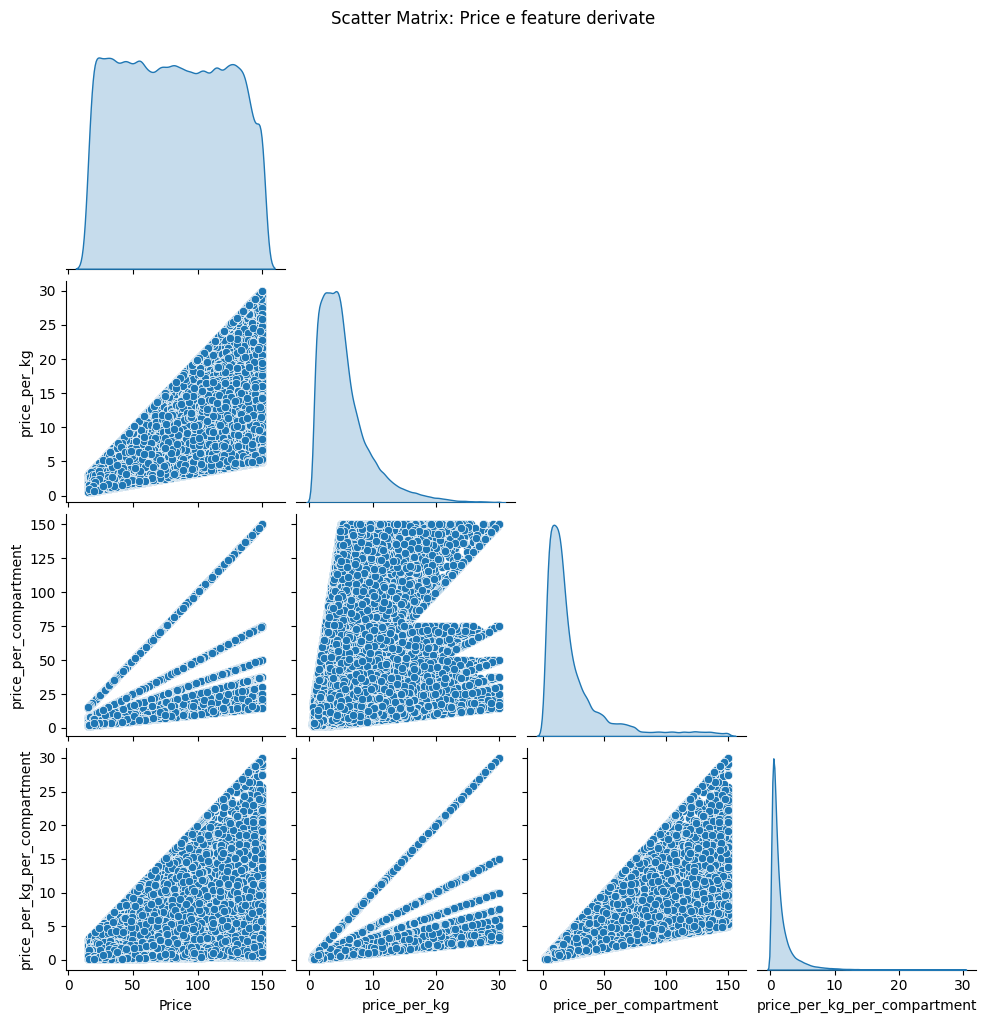

In [36]:
# Scatter matrix tra Price e feature derivate
cols = ['Price', 'price_per_kg', 'price_per_compartment', 'price_per_kg_per_compartment']
sns.pairplot(df[cols], diag_kind='kde', corner=True)
plt.suptitle('Scatter Matrix: Price e feature derivate', y=1.02)
plt.show()